In [26]:
import pandas as pd
import numpy as np

## Load and Prepare Dataset
players_df_full = pd.read_csv('Data/players_21.csv')

In [27]:
## Select features 
features = [
    'age', 'height_cm', 'weight_kg',
    'pace', 'shooting', 'passing',
    'dribbling', 'defending', 'physic'
]

columns = ['short_name'] + features + ['value_eur']
players_df_full = players_df_full[columns]

# Get players with 0 value
unlisted_players_df = players_df_full[players_df_full['value_eur'] == 0].dropna()
unlisted_players_df.shape

(207, 11)

In [28]:
## Load Trained Model
import joblib

model = joblib.load("model/fifa_value_model.pkl")


In [29]:
## Predict Unlisted Players' Value
X_unlisted = unlisted_players_df[features]
predicted_values = model.predict(X_unlisted)
unlisted_players_df['predicted_value'] = predicted_values

In [30]:
## Sort,Save Results and Preview
unlisted_players_df_sorted = unlisted_players_df.sort_values(by='predicted_value', ascending=False)
unlisted_players_df_sorted.to_csv("Results/predicted_unlisted.csv", index=False)

# Preview top 10
print(unlisted_players_df_sorted[['short_name', 'predicted_value']].head(10))

         short_name  predicted_value
359  Juiano Mestres       19457500.0
583     J. Quintero       17172000.0
501      J. Sildero       16515000.0
500     E. Schetino       16025500.0
363  Welington Dano       15940000.0
680  R. Di Leonardo       14778500.0
528      W. Barrios       12575000.0
497       S. Ardero       11131000.0
502    S. Mandíquez       10986500.0
499        M. Nérez       10302500.0


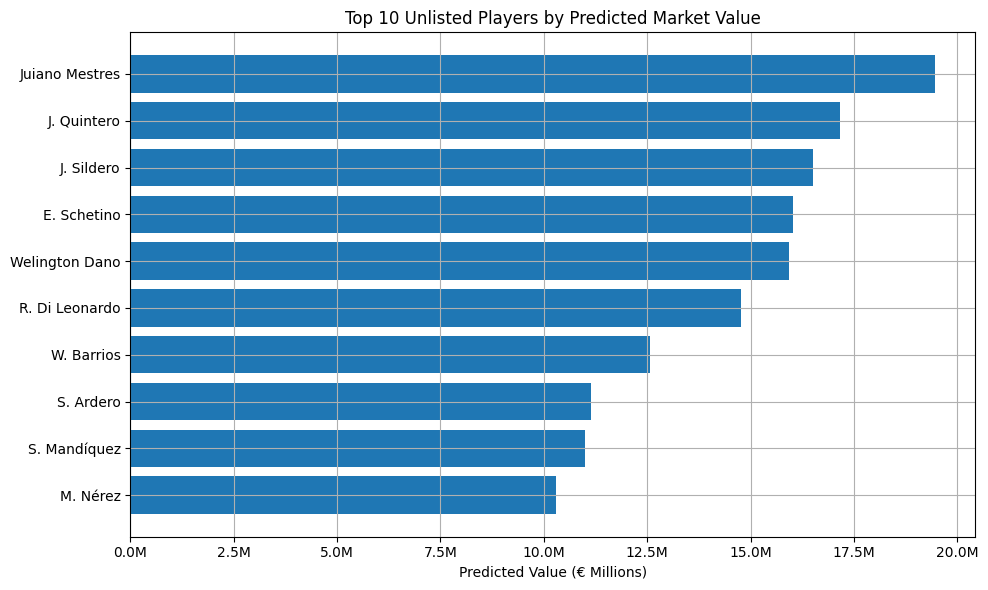

In [33]:
## Visualize Top 10 Predictions
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top10['short_name'], top10['predicted_value'])
plt.xlabel("Predicted Value (€ Millions)")
plt.title("Top 10 Unlisted Players by Predicted Market Value")
plt.gca().invert_yaxis()
plt.grid(True)

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.1f}M'))

plt.tight_layout()
plt.savefig("figures/top10_unlisted.png", dpi=300, bbox_inches='tight')
plt.show()